In [1]:
# importing libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Please change this path as per your storage of raw data files
path = '/Users/animeshkumar/phg/data/raw/*.txt'

In [3]:
#Combining files into a folder
main = pd.concat([pd.read_csv(f,names=['Stock','Date','O','H','L','C','Volume']) for f in glob.glob(path)],ignore_index=True)

In [4]:
#Formatting date and resetting it as index
main['Date'] = pd.to_datetime(main['Date'].astype(str), format='%Y%m%d')
main.set_index('Date')

,Stock,O,H,L,C,Volume
Date,,,,,,
2016-01-21,1AL,1.030,1.030,1.030,1.030,3000
2016-01-21,1PG,3.150,3.150,2.850,3.040,505502
2016-01-21,3DM,0.076,0.076,0.075,0.075,59659
2016-01-21,3PL,1.430,1.530,1.355,1.520,646143
2016-01-21,4DS,0.034,0.034,0.033,0.033,330000
2016-01-21,88E,0.006,0.007,0.006,0.007,1655000
2016-01-21,8EC,0.960,0.960,0.960,0.960,4000
2016-01-21,8IH,1.125,1.180,1.030,1.180,187577
2016-01-21,A2M,1.625,1.655,1.610,1.610,4719248


In [5]:
# Seperate frames for seperate fields
open = main[['Stock','Date','O']]
high = main[['Stock','Date','H']]
low = main[['Stock','Date','L']]
close = main[['Stock','Date','C']]
vol = main[['Stock','Date','Volume']]




In [6]:
# Pivotting the dataframe
open=pd.pivot_table(open,values='O',index=['Date'],columns=['Stock']).reset_index()
high=pd.pivot_table(high,values='H',index=['Date'],columns=['Stock']).reset_index()
low=pd.pivot_table(low,values='L',index=['Date'],columns=['Stock']).reset_index()
close=pd.pivot_table(close,values='C',index=['Date'],columns=['Stock']).reset_index()
vol=pd.pivot_table(vol,values='Volume',index=['Date'],columns=['Stock']).reset_index()


In [7]:
open.head(5)

Stock,Date,1AD,1AG,1AL,1PG,1ST,3DM,3DP,3PL,4CE,...,ZNO,ZNT,ZNZ,ZOZI,ZRL,ZTA,ZUSD,ZYB,ZYL,ZYUS
0,2015-01-02,NaN,NaN,NaN,1.195,NaN,NaN,NaN,2.29,NaN,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,NaN,NaN,NaN,1.230,NaN,NaN,NaN,2.22,NaN,...,NaN,NaN,4.5,NaN,0.070,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,NaN,NaN,NaN,1.260,NaN,NaN,NaN,2.06,NaN,...,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,NaN,NaN,NaN,1.245,NaN,NaN,NaN,2.05,NaN,...,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN
4,2015-01-08,NaN,NaN,NaN,1.250,NaN,NaN,NaN,2.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Statistical properties of whole data
det = open.describe()

In [9]:
# Storing describe stats in another dataframe
st = det.iloc[0,:]

In [10]:
# Subsetting stocks with more than 90% of data
list_clean = st[st >=839]

In [11]:
stocks = list(list_clean.index)
stocks.insert(0,'Date')

In [12]:
# Subsetting main frames based on stock list
open = open[stocks]
high = high[stocks]
low = low[stocks]
close = close[stocks]
vol = vol[stocks]

In [13]:
#Interpolating forward fill in Nan between the data
open = open.fillna(method = 'ffill')
open = open.fillna(0)

high = high.fillna(method = 'ffill')
high = high.fillna(0)

low = low.fillna(method = 'ffill')
low = low.fillna(0)

close = close.fillna(method = 'ffill')
close = close.fillna(0)

vol = vol.fillna(method = 'ffill')
vol = vol.fillna(0)


In [14]:
# Filling other Nans with 0
open.isnull().values.any()
high.isnull().values.any()
low.isnull().values.any()
close.isnull().values.any()
vol.isnull().values.any()

False

In [15]:
# resetting index
open.set_index('Date',inplace=True)
high.set_index('Date',inplace=True)
low.set_index('Date',inplace=True)
close.set_index('Date',inplace=True)
vol.set_index('Date',inplace=True)


In [16]:
# feature 1- High by low caluclation
feat1 = high/low


In [17]:
# Returns calculation
returns = (close / close.shift(1)) - 1
returns.replace([np.inf, -np.inf], np.nan,inplace=True)

In [18]:
returns.fillna(0, inplace = True)

In [19]:
# Forward returns
freturns = returns.shift(-1)

In [20]:
freturns.fillna(0,inplace = True)

In [21]:
open['2017-06':].shape

(273, 520)

In [22]:
# Splitting data-sets into training and testing
test_o = open['2017-06':].copy()
test_h = high['2017-06':].copy()
test_l = low['2017-06':].copy()
test_c = close['2017-06':].copy()
test_v = vol['2017-06':].copy()
test_ret = returns['2017-06':].copy()
test_fret = freturns['2017-06':].copy()
test_feat1 = feat1['2017-06':].copy()

train_o = open[:'2017-05'].copy()
train_h = high[:'2017-05'].copy()
train_l = low[:'2017-05'].copy()
train_c = close[:'2017-05'].copy()
train_v = vol[:'2017-05'].copy()
train_ret = returns[:'2017-05'].copy()
train_fret = freturns[:'2017-05'].copy()
train_feat1 = feat1[:'2017-05'].copy()

In [23]:
train_fret[train_fret>.1] = .1
train_fret[train_fret<-.1]= -.1

test_fret[test_fret>.1] = .1
test_fret[test_fret<-.1] = -.1


In [24]:
train_ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610 entries, 2015-01-02 to 2017-05-31
Columns: 520 entries, 3PL to YOW
dtypes: float64(520)
memory usage: 2.4 MB


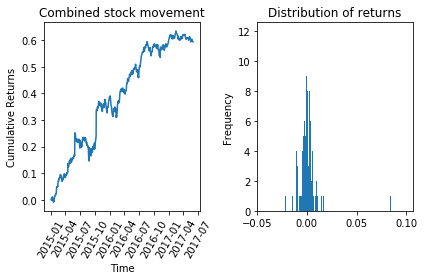

In [25]:
#cols = ['3PL','AAA','AAD']
# Combined Movement of all the stocks, returns distribution
mean = train_ret.mean(axis='columns')

plt.subplot(1,2,1)
plt.plot(mean.cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=60)
plt.title('Combined stock movement')


plt.subplot(1,2,2)
mean = train_ret.mean(axis='columns')
mean.plot( kind='hist', bins=1000)
plt.title('Distribution of returns')
plt.tight_layout()
plt.savefig('combined.jpg')

plt.show()


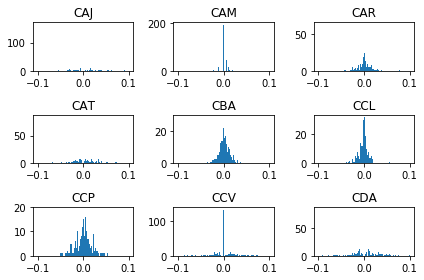

In [26]:
#Taking out stocks to analyse features - Stocks with returns normally distributed will be selected
sample = list(train_ret.columns[90:99])
#dates = train_ret['Date']
stock1=train_ret[sample[0]]
stock2=train_ret[sample[1]]
stock3=train_ret[sample[2]]
stock4=train_ret[sample[3]]
stock5=train_ret[sample[4]]
stock6=train_ret[sample[5]]
stock7=train_ret[sample[6]]
stock8=train_ret[sample[7]]
stock9=train_ret[sample[8]]

plt.subplot(3,3,1)
plt.hist(stock1,bins=300,range=(-.1,.1))
plt.title(sample[0])

plt.subplot(3,3,2)
plt.hist(stock2,bins=300,range=(-.1,.1))
plt.title(sample[1])


plt.subplot(3,3,3)
plt.hist(stock3,bins=300,range=(-.1,.1))
plt.title(sample[2])


plt.subplot(3,3,4)
plt.hist(stock4,bins=300,range=(-.1,.1))
plt.title(sample[3])

plt.subplot(3,3,5)
plt.hist(stock5,bins=300,range=(-.1,.1))
plt.title(sample[4])

plt.subplot(3,3,6)
plt.hist(stock6,bins=300,range=(-.1,.1))
plt.title(sample[5])

plt.subplot(3,3,7)
plt.hist(stock7,bins=300,range=(-.1,.1))
plt.title(sample[6])

plt.subplot(3,3,8)
plt.hist(stock8,bins=300,range=(-.1,.1))
plt.title(sample[7])

plt.subplot(3,3,9)
plt.hist(stock9,bins=300,range=(-.1,.1))
plt.title(sample[8])

plt.tight_layout()
plt.show()

Stock         ABC         AGL         ALL         AMC         ARG         CBA
count  610.000000  610.000000  610.000000  610.000000  610.000000  610.000000
mean     4.916820   18.693082   11.812016   14.329410    7.622148   80.281393
std      0.585491    3.502331    3.867760    0.925913    0.306707    6.180827
min      3.530000   13.460000    6.280000   12.160000    7.120000   69.500000
25%      4.480000   16.140000    8.422500   13.560000    7.340000   75.047500
50%      4.995000   18.230000   10.005000   14.320000    7.610000   79.405000
75%      5.400000   19.927500   15.337500   15.077500    7.890000   84.627500
max      6.040000   28.440000   21.800000   16.420000    8.420000   96.320000


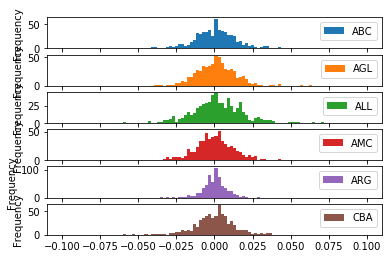

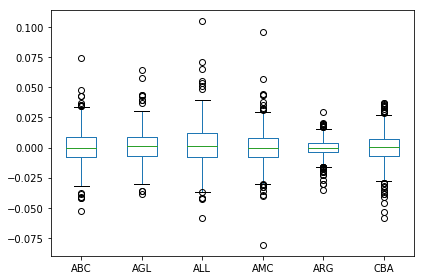

In [27]:
#Selected normally distributed stocks and there box plots
selected = ['ABC','AGL','ALL','AMC','ARG','CBA']
print(train_c[selected].describe())
train_ret[selected].plot(kind='hist',subplots=True,bins=100,range=(-.10,.10))
train_ret[selected].plot(kind='box')
plt.tight_layout()
plt.show()

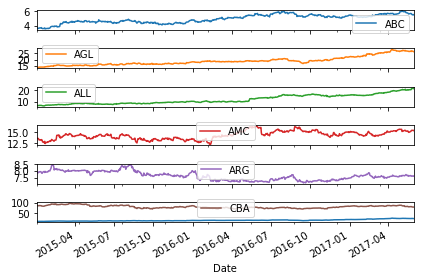

In [28]:
# Close prices for selected stocks
train_c[selected].plot(subplots=True)
train_c['AGL'].plot()
plt.tight_layout()
plt.show()
#df_feat

[]

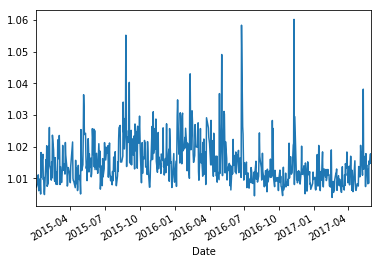

In [29]:
#High by Low - Feature 1
train_feat1['CBA'].plot()
plt.plot()

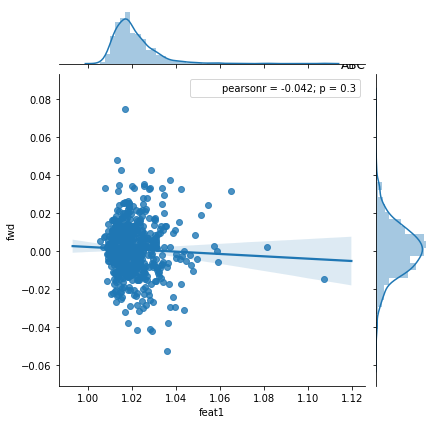

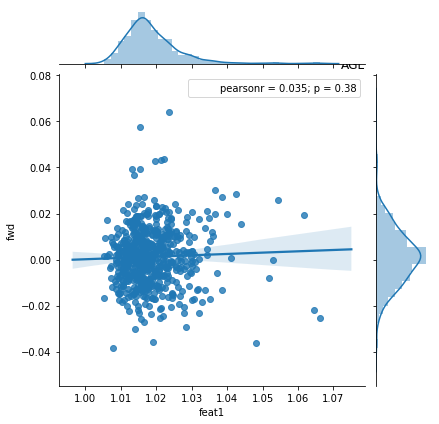

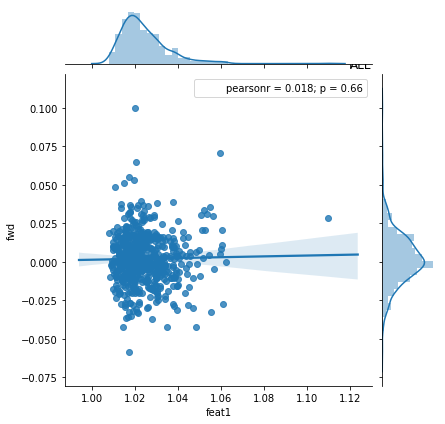

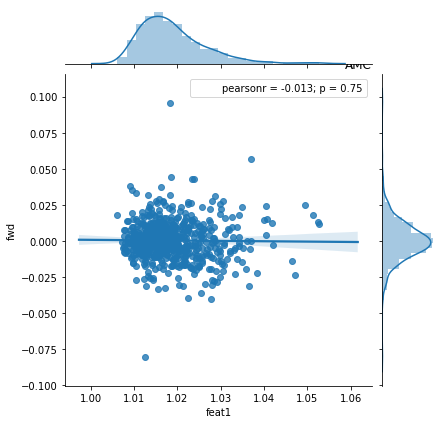

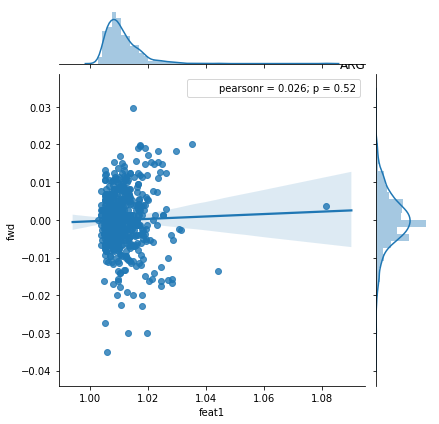

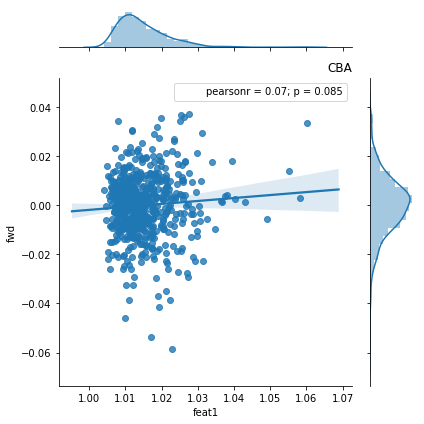

In [30]:
#Linear plots for H by L
#stock = selected[4]
for stock in selected:
    df_feat1 = pd.DataFrame({'feat1':train_feat1[stock],'fwd':train_fret[stock],'ret':train_ret[stock]})
    p=sns.jointplot(x='feat1',y='fwd',data=df_feat1,kind='reg')
    p.annotate(stats.pearsonr)
    plt.title(stock,loc='right')


plt.tight_layout()
plt.show()
#df_feat

In [31]:
alpha_feat1 = train_feat1 - train_feat1.rolling(10).mean()

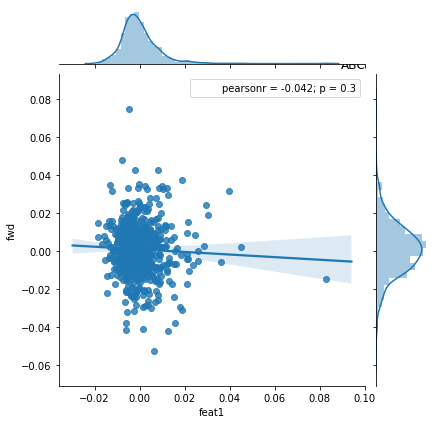

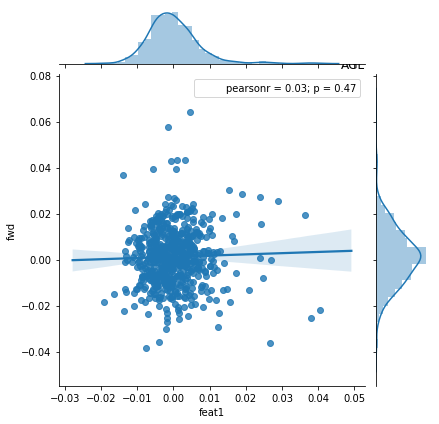

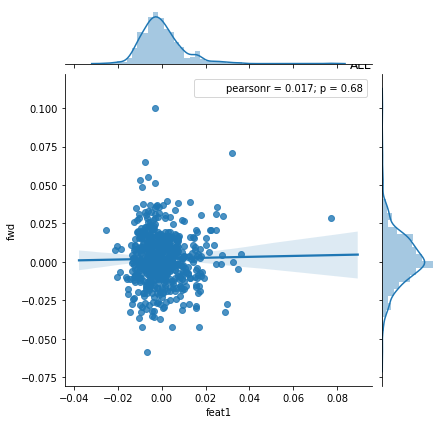

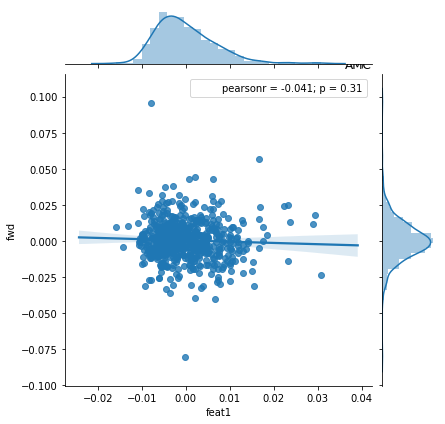

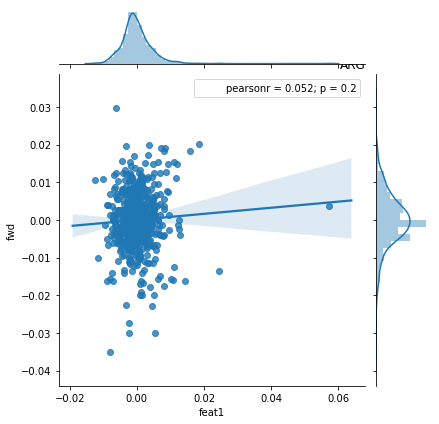

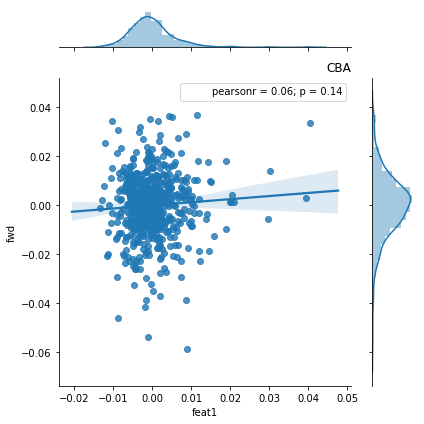

In [32]:
# Linear plots for ROC H by L
for stock in selected:
    df_feat = pd.DataFrame({'feat1':alpha_feat1[stock],'fwd':train_fret[stock],'ret':train_ret[stock]})
    p=sns.jointplot(x='feat1',y='fwd',data=df_feat,kind='reg')
    p.annotate(stats.pearsonr)
    plt.title(stock,loc='right')


plt.tight_layout()
plt.show()

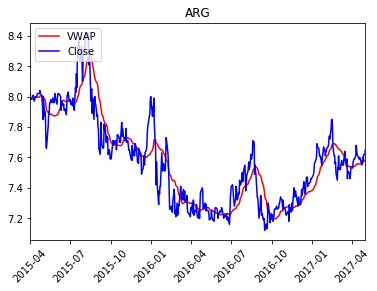

In [33]:
# Calculating VWAP
len_vwap = 22
stock = selected[4]
vol_price = (train_c*train_v)
train_feat2 = (vol_price.rolling(len_vwap).sum()/train_v.rolling(len_vwap).sum())
plt.plot(train_feat2[stock],label='VWAP',color='red')
plt.plot(train_c[stock],label='Close',color='blue')
plt.xticks(rotation=45)
plt.xlim('2015-04','2017-05')
plt.legend(loc='upper left')
plt.title(stock)
plt.show()

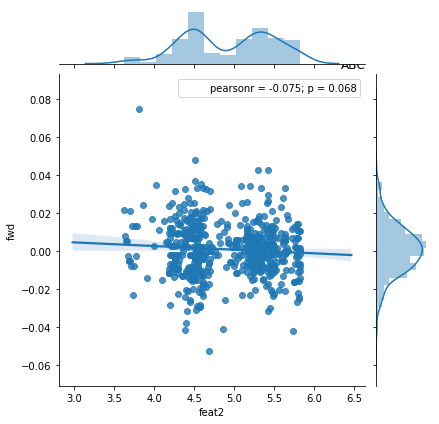

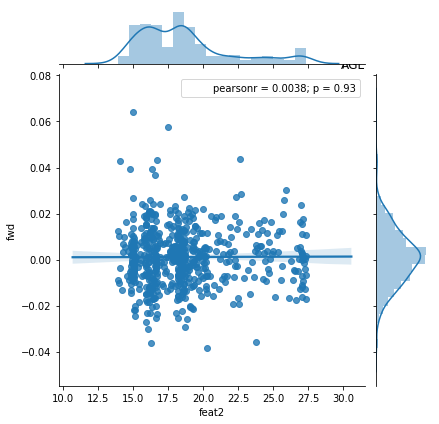

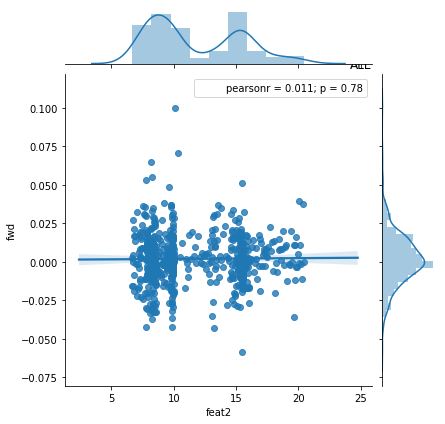

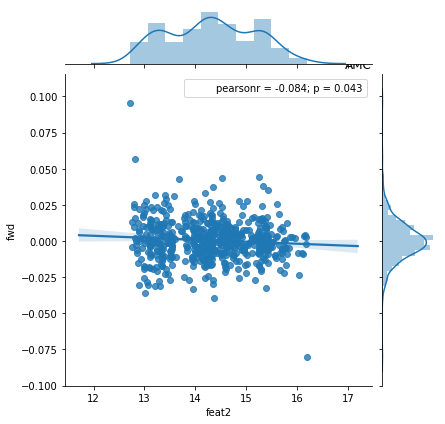

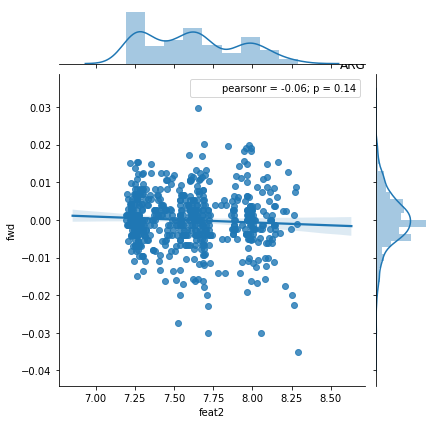

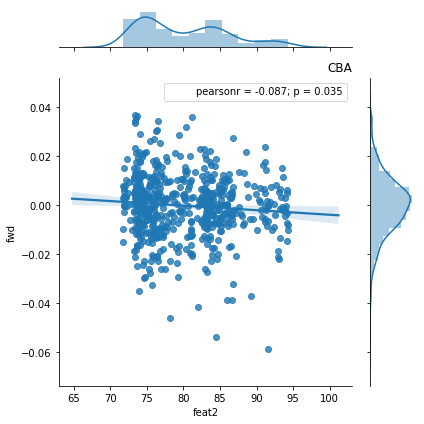

In [34]:
#Linear plots for VWAP
alpha_feat2 = (train_c.rolling(5).mean() - train_feat2)/train_feat2
for stock in selected:
    df_feat = pd.DataFrame({'feat1':train_feat1[stock],'feat2':train_feat2[stock],'fwd':train_fret[stock],'ret':train_ret[stock]})
    p=sns.jointplot(x='feat2',y='fwd',data=df_feat,kind='reg')
    p.annotate(stats.pearsonr)
    plt.title(stock,loc='right')


plt.tight_layout()
plt.show()

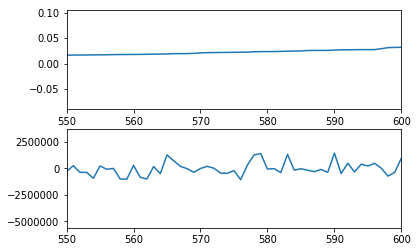

In [35]:
stock = selected[3]
temp = train_v[stock]*(train_c[stock] - train_o[stock])
df_eda1 = pd.DataFrame({'vol':temp,'fret':train_fret[stock]})
df_eda1.sort_values(by=['fret'],inplace=True)
plt.subplot(2,1,1)
plt.plot(df_eda1['fret'].values)
plt.xlim(550,600)

plt.subplot(2,1,2)
plt.plot(df_eda1['vol'].values)
plt.xlim(550,600)

plt.show()




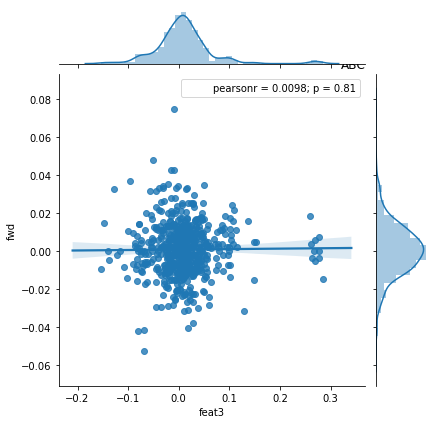

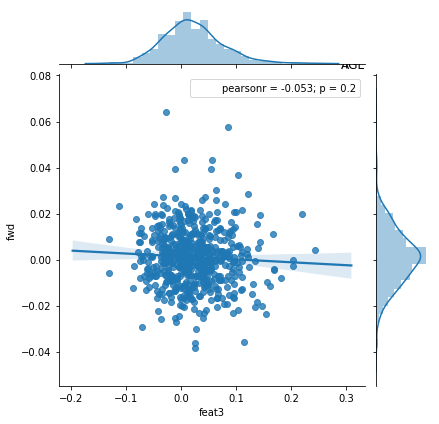

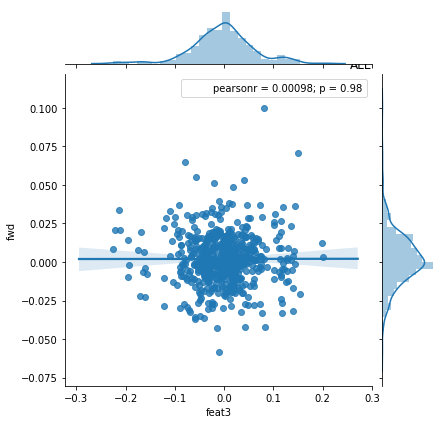

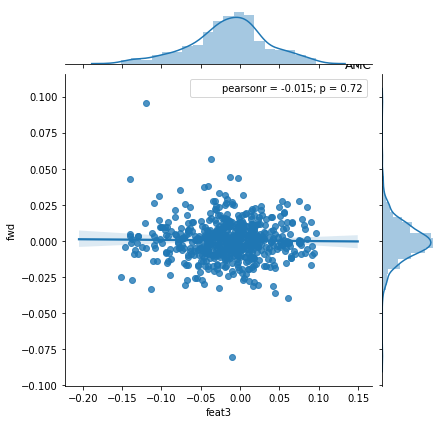

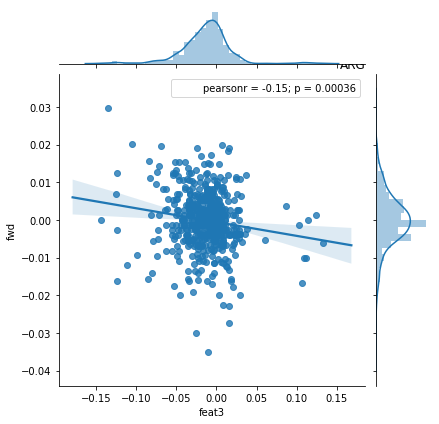

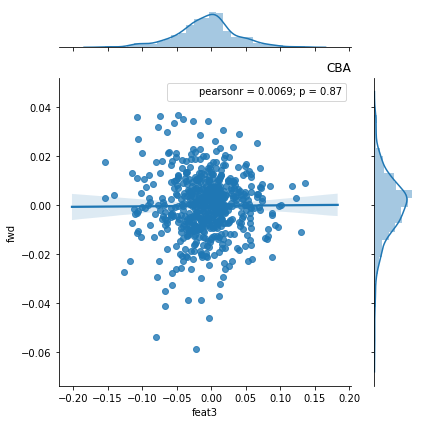

In [36]:
#Linear plots for Volume
stock = selected[0]
train_feat3 = (train_v/train_v.rolling(22).mean())*((train_c - train_o)/train_c)
alpha_feat3 = train_feat3.rolling(10).sum()
for stock in selected:
    df_feat = pd.DataFrame({'feat1':train_feat1[stock],'feat2':train_feat2[stock],'feat3':alpha_feat3[stock],'fwd':train_fret[stock],'ret':train_ret[stock]})
    p=sns.jointplot(x='feat3',y='fwd',data=df_feat,kind='reg')
    p.annotate(stats.pearsonr)
    plt.title(stock,loc='right')


plt.tight_layout()
plt.show()

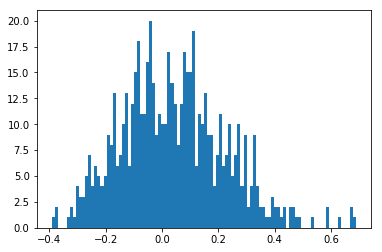

In [37]:
# feature based on High, Low, Close dynamics
train_feat4 = train_h.rolling(10).max() - train_c
train_feat5 = train_c - train_l.rolling(10).min()
alpha_feat4 = (train_feat5.rolling(5).sum()-train_feat4.rolling(5).sum())/train_c
plt.hist(alpha_feat4[selected[0]],bins=100)
plt.show()

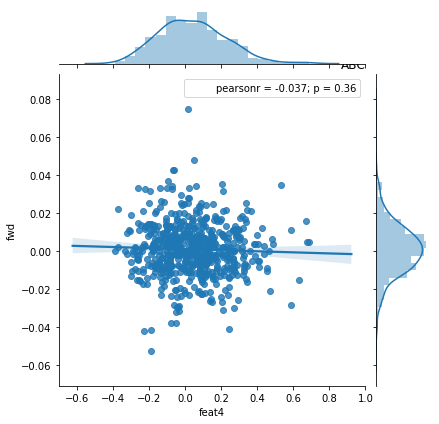

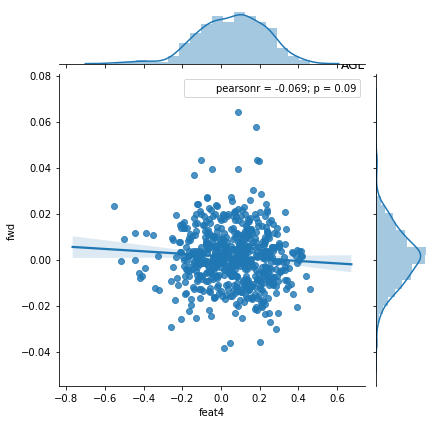

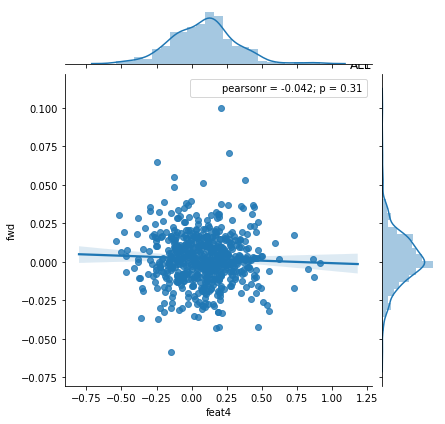

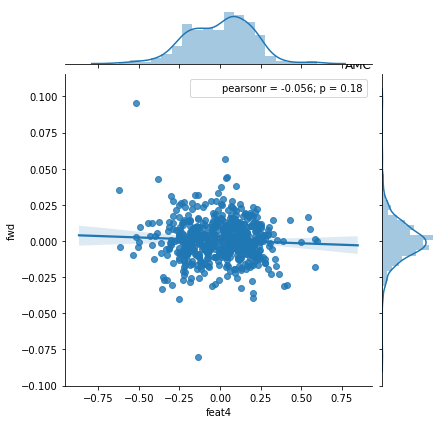

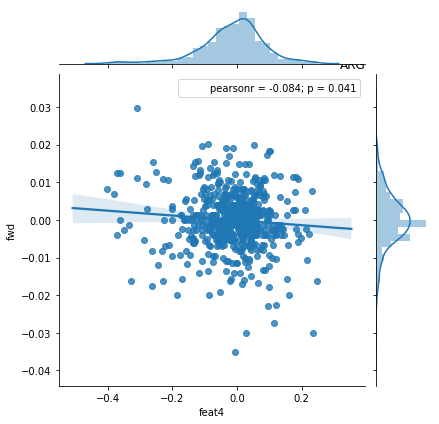

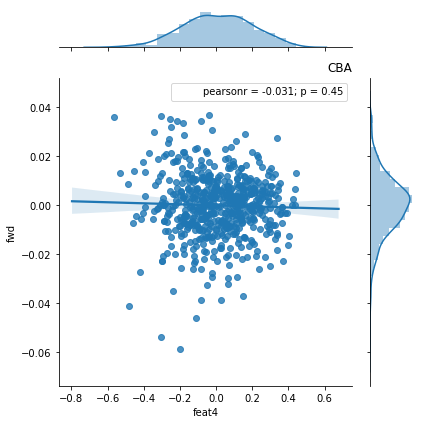

In [38]:
#Linear plots for Volume
stock = selected[0]
for stock in selected:
    df_feat = pd.DataFrame({'feat1':train_feat1[stock],'feat2':train_feat2[stock],'feat3':alpha_feat3[stock],'feat4':alpha_feat4[stock],'fwd':train_fret[stock],'ret':train_ret[stock]})
    p=sns.jointplot(x='feat4',y='fwd',data=df_feat,kind='reg')
    p.annotate(stats.pearsonr)
    plt.title(stock,loc='right')


plt.tight_layout()
plt.show()

In [39]:
alpha_feat1.describe()

Stock,3PL,AAA,AAC,AAD,ABC,ABP,ABX,ACR,ACW,ADJ,...,XPJ,XRO,XSJ,XSO,XTJ,XTL,XTO,XUJ,XXJ,YOW
count,601.000000,6.010000e+02,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,600.000000,601.000000,...,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.000015,-1.660962e-06,-0.000127,-0.000121,0.000005,-0.000056,-0.000188,-0.000034,-0.000808,0.000024,...,-0.000020,-0.000025,-0.000028,-0.000035,-0.000004,-0.000019,-0.000025,-0.000010,0.000010,-0.000126
std,0.027035,9.452472e-05,0.011382,0.024706,0.008653,0.007714,0.041901,0.037597,0.043477,0.032540,...,0.005580,0.014750,0.006148,0.004517,0.006880,0.005529,0.005054,0.005647,0.006449,0.030001
min,-0.062483,-3.193057e-04,-0.023723,-0.049935,-0.018561,-0.018806,-0.104460,-0.129223,-0.155932,-0.082381,...,-0.012183,-0.040918,-0.013675,-0.011567,-0.019064,-0.013289,-0.010948,-0.017153,-0.015409,-0.066884
25%,-0.014849,-2.005158e-05,-0.007555,-0.010211,-0.005174,-0.004927,-0.025587,-0.012724,-0.026465,-0.018887,...,-0.003717,-0.008336,-0.003743,-0.002743,-0.003882,-0.003283,-0.003125,-0.003532,-0.003626,-0.017823
50%,-0.003135,-7.561508e-08,-0.001378,-0.004026,-0.001408,-0.001020,-0.005605,-0.003536,-0.004852,-0.003955,...,-0.000863,-0.002826,-0.001013,-0.000810,-0.000781,-0.000724,-0.000803,-0.001006,-0.001064,-0.005534
75%,0.008723,1.968957e-05,0.005666,0.005542,0.003333,0.003455,0.017433,0.009154,0.016815,0.014620,...,0.002330,0.005274,0.002306,0.002098,0.002660,0.002281,0.002410,0.002793,0.002764,0.011951
max,0.263795,1.257899e-03,0.079329,0.278851,0.082852,0.046042,0.299705,0.695947,0.246590,0.325836,...,0.025193,0.071944,0.047671,0.030863,0.066312,0.042584,0.037668,0.038439,0.046131,0.188928


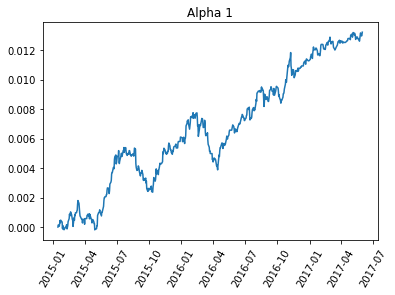

In [40]:
# Analysing Alpha1
pos_alpha1 = (alpha_feat1).copy()
type(pos_alpha1)
thr1 = .1
pos_alpha1 = -1*pos_alpha1
pos_alpha1[pos_alpha1>thr1] = 1
pos_alpha1[pos_alpha1<-thr1] = -1
pos_alpha1[(pos_alpha1<thr1) & (pos_alpha1>-thr1)]= 0
pos_alpha1.tail(20)

pl_alpha1 = pos_alpha1*(train_fret)

ret1 = pl_alpha1.mean(axis='columns')
plt.plot(ret1.cumsum())
plt.xticks(rotation=60)
plt.title('Alpha 1')
plt.show()

In [41]:
np.argmax(ret1)

Timestamp('2016-10-31 00:00:00')

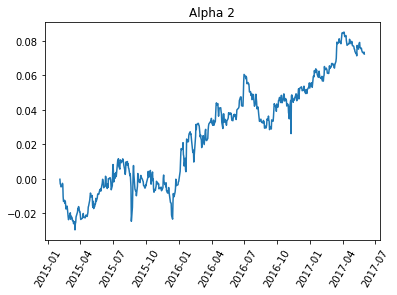

In [42]:
# PL stats for feature 2
pos_alpha2 = (alpha_feat2).copy()
type(pos_alpha2)
thr2 = 0
pos_alpha2 = -1*pos_alpha2
pos_alpha2[pos_alpha2>thr2] = 1
pos_alpha2[pos_alpha2<-thr2] = -1
#pos_alpha2[(pos_alpha2<thr2) & (pos_alpha2>-thr2)]= 0
pos_alpha2.tail(20)

pl_alpha2 = pos_alpha2*(train_fret)

ret2 = pl_alpha2.mean(axis='columns')
plt.plot(ret2.cumsum())
plt.xticks(rotation=60)
plt.title('Alpha 2')
plt.show()

In [43]:
np.argmax(ret2)

Timestamp('2016-11-09 00:00:00')

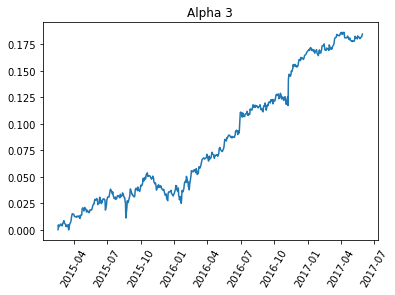

In [44]:
# PL stats for feature 3
pos_alpha3 = (alpha_feat3).copy()
type(pos_alpha3)
thr3 = 0
pos_alpha3 = -1*pos_alpha3
pos_alpha3[pos_alpha3> thr3] = 1
pos_alpha3[pos_alpha3< -thr3] = -1
pos_alpha3[(pos_alpha3<thr3) & (pos_alpha3>-thr3)]= 0
pos_alpha3.tail(20)

pl_alpha3 = pos_alpha3*(train_fret)

ret3 = pl_alpha3.mean(axis='columns')
plt.plot(ret3.cumsum())
plt.xticks(rotation=60)
plt.title('Alpha 3')
plt.show()

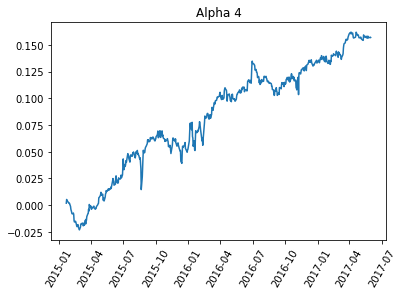

In [45]:
# PL stats for feature 4
pos_alpha4 = (alpha_feat4).copy()
type(pos_alpha4)
thr4 = 0.0
pos_alpha4 = -1*pos_alpha4
pos_alpha4[pos_alpha4>thr4] = 1
pos_alpha4[pos_alpha4<-thr4] = -1
pos_alpha4[(pos_alpha4<thr4) & (pos_alpha4>-thr4)]= 0
pos_alpha4.tail(20)

pl_alpha4 = pos_alpha4*(train_fret)

ret4 = pl_alpha4.mean(axis='columns')
plt.plot(ret4.cumsum())
plt.xticks(rotation=60)
plt.title('Alpha 4')
plt.show()

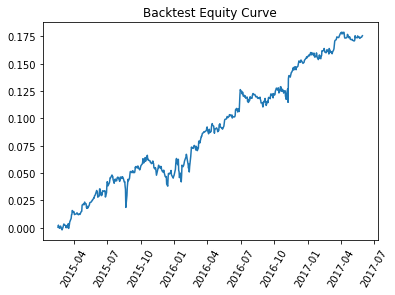

In [46]:
# Strategy based on features
strat_1 =  pos_alpha3 + pos_alpha4
thr = 0
strat_1[strat_1> thr] = 1
strat_1[strat_1< -thr] = -1
strat_1[(strat_1<thr) & (strat_1> -thr)]= 0
strat_1.tail(20)

pl_strat = strat_1*(train_fret)

ret = pl_strat.mean(axis='columns')
plt.plot(ret.cumsum())
plt.xticks(rotation=60)
plt.title("Backtest Equity Curve")
plt.show()


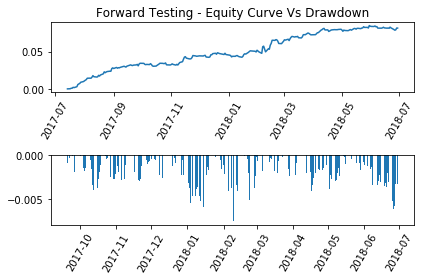

In [47]:
#Forward data testing of selected features
test_feat3 = (test_v/test_v.rolling(22).mean())*((test_c - test_o)/test_c)
alpha_feat3_test = test_feat3.rolling(10).sum()

pos_alpha3_test = (alpha_feat3_test).copy()

thr3 = 0
pos_alpha3_test = -1*pos_alpha3_test
pos_alpha3_test[pos_alpha3_test> thr3] = 1
pos_alpha3_test[pos_alpha3_test< -thr3] = -1
pos_alpha3_test[(pos_alpha3_test<thr3) & (pos_alpha3_test>-thr3)]= 0


test_feat4 = test_h.rolling(10).max() - test_c
test_feat5 = test_c - test_l.rolling(10).min()
alpha_feat4_test = (test_feat5.rolling(5).sum()-test_feat4.rolling(5).sum())/test_c
pos_alpha4_test = alpha_feat4_test.copy()
thr4 = 0.0
pos_alpha4_test = -1*pos_alpha4_test
pos_alpha4_test[pos_alpha4_test>thr4] = 1
pos_alpha4_test[pos_alpha4_test<-thr4] = -1
pos_alpha4_test[(pos_alpha4_test<thr4) & (pos_alpha4_test>-thr4)]= 0


strat_1_test =  pos_alpha3_test + pos_alpha4_test
thr = 0
strat_1_test[strat_1_test> thr] = 1
strat_1_test[strat_1_test< -thr] = -1
strat_1_test[(strat_1_test<thr) & (strat_1_test> -thr)]= 0
strat_1_test.tail(20)

pl_strat_test = strat_1_test*(test_fret)

ret_test = pl_strat_test.mean(axis='columns')

plt.subplot(2,1,1)
plt.plot(ret_test.cumsum())
plt.xticks(rotation=60)
plt.title("Forward Testing - Equity Curve Vs Drawdown")

plt.subplot(2,1,2)
y=  ret_test.cumsum() - ret_test.cumsum().rolling(50).max()
plt.bar(y.index,y )
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


50.91575091575091


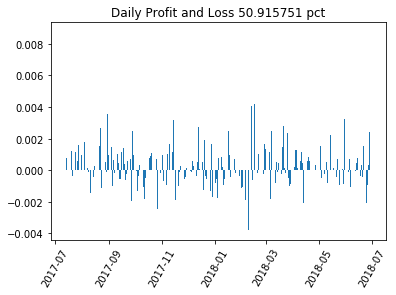

In [48]:
positive = sum(ret_test> 0)*100/len(ret_test)
print(positive)
y = ret_test
x = y.index
yy=list(y)
plt.xticks(rotation = 60)
plt.bar(x,yy,linewidth=100)
plt.title("Daily Profit and Loss %f pct"%(positive))
plt.show()

In [51]:
# Monthly
print(ret_test.resample('M').sum())



Date
2017-06-30    0.000000
2017-07-31    0.010473
2017-08-31    0.018060
2017-09-30    0.006094
2017-10-31   -0.002272
2017-11-30    0.011784
2017-12-31    0.002019
2018-01-31    0.005670
2018-02-28    0.011717
2018-03-31    0.008652
2018-04-30    0.007352
2018-05-31    0.004067
2018-06-30   -0.002510
Freq: M, dtype: float64


In [50]:
ret_test.resample('Y').sum()

Date
2017-12-31    0.046159
2018-12-31    0.034947
Freq: A-DEC, dtype: float64